In [1]:
from __future__ import absolute_import, division, print_function

import os
import matplotlib.pyplot as plt

import tensorflow as tf
import tensorflow.contrib.eager as tfe

tf.enable_eager_execution()

print("TensorFlow version: {}".format(tf.VERSION))
print("Eager execution: {}".format(tf.executing_eagerly()))

Instructions for updating:
Use the retry module or similar alternatives.
TensorFlow version: 1.7.0
Eager execution: True


In [2]:
train_dataset_url = "/home/japneet/work/notebooks/twitter_df_nn.csv"

#train_dataset_fp = tf.keras.utils.get_file(fname=os.path.basename(train_dataset_url),
#                                           origin=train_dataset_url)
train_dataset_fp='/home/japneet/work/notebooks/twitter_df_nn.csv'
print("Local copy of the dataset file: {}".format(train_dataset_fp))

Local copy of the dataset file: /home/japneet/work/notebooks/twitter_df_nn.csv


In [3]:
!head -n5 {train_dataset_fp}

Polarity,ner_text
0,That is true now
1,Next up in adventures in Macintosh emulation in the is Rogue by Jack
-1,Renewables not natural gas are cutting England power sector emissions
0,Int Sys New refinements TWO new modes Tons to do Me Please locate lord ike of crimea


In [358]:
from gensim.models import Word2Vec

sentences=[]
for row in open('/home/japneet/work/notebooks/twitter_df_nn.csv'):
    sentences.append(row.split(',')[1].split())

model1 = Word2Vec(sentences, size=30, window=5, min_count=5, workers=4)

In [359]:
model1

In [362]:
import sys
#reload(sys)
#sys.setdefaultencoding("utf-8")

######################
# Loading word2vec
######################
import gensim
from gensim.models import word2vec
# Change this to your own path.
pathToBinVectors = 'GoogleNews-vectors-negative300.bin'
#pathToBinVectors = 'twitter_vec'

print ("Loading the data file... Please wait...")
#model1 = model
#model1 = gensim.models.Word2Vec.load(pathToBinVectors)
print ("Successfully loaded 3.6 G bin file!")

# How to call one word vector?
# model1['resume'] -> This will return NumPy vector of the word "resume".

import numpy as np
import math
from scipy.spatial import distance

from random import sample
import sys
from nltk.corpus import stopwords


class PhraseVector:
	def __init__(self, phrase):
		self.vector = self.PhraseToVec(phrase)
		#print("phrase is",phrase)
	# <summary> Calculates similarity between two sets of vectors based on the averages of the sets.</summary>
	# <param>name = "vectorSet" description = "An array of arrays that needs to be condensed into a single array (vector). In this class, used to convert word vecs to phrases."</param>
	# <param>name = "ignore" description = "The vectors within the set that need to be ignored. If this is an empty list, nothing is ignored. In this class, this would be stop words."</param>
	# <returns> The condensed single vector that has the same dimensionality as the other vectors within the vecotSet.</returns>
	def ConvertVectorSetToVecAverageBased(self, vectorSet, ignore = []):
		if len(ignore) == 0: 
			return np.mean(vectorSet, axis = 0)
		else: 
			return np.dot(np.transpose(vectorSet),ignore)/sum(ignore)

	def PhraseToVec(self, phrase):
		#print('phrase now is ',phrase)
		cachedStopWords = []#stopwords.words("english")
		#phrase = phrase.lower()
		wordsInPhrase = [word for word in phrase.split() if word not in cachedStopWords]
		vectorSet = []
		for aWord in wordsInPhrase:
			try:
				#print (aWord)
				wordVector=model1[aWord]
				#print(wordVector)
				vectorSet.append(wordVector)
			except:
				#print("word not in vocab")
				vectorSet.append(list(np.zeros(30)))
		return self.ConvertVectorSetToVecAverageBased(vectorSet)

	# <summary> Calculates Cosine similarity between two phrase vectors.</summary>
	# <param> name = "otherPhraseVec" description = "The other vector relative to which similarity is to be calculated."</param>
	def CosineSimilarity(self, otherPhraseVec):
		cosine_similarity = np.dot(self.vector, otherPhraseVec) / (np.linalg.norm(self.vector) * np.linalg.norm(otherPhraseVec))
		try:
			if math.isnan(cosine_similarity):
				cosine_similarity=0
		except:
			cosine_similarity=0
		return cosine_similarity

"""
if __name__ == "__main__":
	print "###################################################################"
	print "###################################################################"
	print "########### WELCOME TO THE PHRASE SIMILARITY CALCULATOR ###########" 
	print "###################################################################"		
	print "###################################################################"

	while True:
		userInput1 = raw_input("Type the phrase1: ")
		userInput2 = raw_input("Type the phrase2: ")

		phraseVector1 = PhraseVector(userInput1)
		phraseVector2 = PhraseVector(userInput2)
		similarityScore  = phraseVector1.CosineSimilarity(phraseVector2.vector)
    
		print "###################################################################"
		print "Similarity Score: ", similarityScore
		print "Phrase vector one",phraseVector1.vector
        print "Phrase vector two",phraseVector2.vector
        print "###################################################################"
"""

Loading the data file... Please wait...
Successfully loaded 3.6 G bin file!


'\nif __name__ == "__main__":\n\tprint "###################################################################"\n\tprint "###################################################################"\n\tprint "########### WELCOME TO THE PHRASE SIMILARITY CALCULATOR ###########" \n\tprint "###################################################################"\t\t\n\tprint "###################################################################"\n\n\twhile True:\n\t\tuserInput1 = raw_input("Type the phrase1: ")\n\t\tuserInput2 = raw_input("Type the phrase2: ")\n\n\t\tphraseVector1 = PhraseVector(userInput1)\n\t\tphraseVector2 = PhraseVector(userInput2)\n\t\tsimilarityScore  = phraseVector1.CosineSimilarity(phraseVector2.vector)\n    \n\t\tprint "###################################################################"\n\t\tprint "Similarity Score: ", similarityScore\n\t\tprint "Phrase vector one",phraseVector1.vector\n        print "Phrase vector two",phraseVector2.vector\n        print "######################

In [366]:
def parse_csv(line):
   
  #phraseVector1 = PhraseVector(line.split(',')[1]).vector
  example_defaults = [[0],['a']]  # sets field types
  parsed_line = tf.decode_csv(line, example_defaults)
  # First 4 fields are features, combine into single tensor
  #print('line is',line)
  features = tf.reshape(parsed_line[1:], shape=())
  # Last field is the label
  label = tf.reshape(parsed_line[0], shape=())
  print ("features are ",features)
  print ("label is ",label)
  return features, label


def vectorize(feature,label):
    phraseVector1 = PhraseVector(feature[0]).vector
    #print (phraseVector1)
    if label[0]==-1:
        label[0]=2
    return phraseVector1.astype(np.float32),label

phraseVector1 = PhraseVector("truly ingenious book by Dr Jack Glimpse of Heaven").vector
print (phraseVector1)



[ 0.06897447  0.08477153 -0.11516629  0.05288737 -0.00165669 -0.03968364
  0.0136703   0.00181664 -0.02421884  0.03148619 -0.0077001  -0.06325057
 -0.08491342 -0.04611899 -0.00414454  0.07493228  0.02549795 -0.11902907
 -0.01823385  0.01920757 -0.05120926  0.00609353  0.01445676  0.08176727
 -0.02839549  0.03601159 -0.03647697  0.01498241 -0.07828706 -0.03762156]


In [367]:
train_dataset = tf.data.TextLineDataset('/home/japneet/work/notebooks/twitter_df_nn.csv')
train_dataset = train_dataset.skip(1)             # skip the first header row
train_dataset = train_dataset.map(parse_csv)      # parse each row
train_dataset = train_dataset.shuffle(buffer_size=1000)  # randomize
train_dataset = train_dataset.batch(1)

# View a single example entry from a batch
train_dataset = train_dataset.map(
    lambda feature, label: tuple(tf.py_func(
        vectorize, [feature, label], [tf.float32, label.dtype])))

train_dataset = train_dataset.batch(32)

features, label = tfe.Iterator(train_dataset).next()
print("example features:", features[0])
print("example label:", label[0])



features are  Tensor("Reshape:0", shape=(), dtype=string)
label is  Tensor("Reshape_1:0", shape=(), dtype=int32)
example features: tf.Tensor(
[ 0.08206399  0.10672311 -0.1358502   0.06567378  0.00222818 -0.05261248
  0.01906386 -0.00309031 -0.03029428  0.04889737 -0.0082097  -0.07290035
 -0.10269936 -0.06037911 -0.00092346  0.09109397  0.03832039 -0.14804776
 -0.02704593  0.02339754 -0.05260633  0.01309457  0.01463434  0.09941975
 -0.03917816  0.04743631 -0.04095774  0.02203365 -0.09837483 -0.04375859], shape=(30,), dtype=float32)
example label: tf.Tensor([0], shape=(1,), dtype=int32)


In [383]:
model = tf.keras.Sequential([
  tf.keras.layers.Dense(10, activation="tanh", input_shape=(30,)),  # input shape required
  tf.keras.layers.Dense(10, activation="tanh"),
  tf.keras.layers.Dense(3)
])

In [384]:
def loss(model, x, y):
  #print(x,y)
  y_ = model(x)
  #print(y_)
  return tf.losses.sparse_softmax_cross_entropy(labels=y, logits=y_)

def grad(model, inputs, targets):
  with tfe.GradientTape() as tape:
    loss_value = loss(model, inputs, targets)
  return tape.gradient(loss_value, model.variables)

In [385]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001)

In [386]:
## Note: Rerunning this cell uses the same model variables

# keep results for plotting
train_loss_results = []
train_accuracy_results = []

num_epochs = 201

for epoch in range(num_epochs):
  epoch_loss_avg = tfe.metrics.Mean()
  epoch_accuracy = tfe.metrics.Accuracy()

  # Training loop - using batches of 32
  for x, y in tfe.Iterator(train_dataset):
    # Optimize the model
    #print(x)
    grads = grad(model, x, y)
    optimizer.apply_gradients(zip(grads, model.variables),
                              global_step=tf.train.get_or_create_global_step())

    # Track progress
    epoch_loss_avg(loss(model, x, y))  # add current batch loss
    # compare predicted label to actual label
    epoch_accuracy(tf.argmax(model(x), axis=1, output_type=tf.int32), y)

  # end epoch
  train_loss_results.append(epoch_loss_avg.result())
  train_accuracy_results.append(epoch_accuracy.result())

  if epoch % 50 == 0:
    print("Epoch {:03d}: Loss: {:.3f}, Accuracy: {:.3%}".format(epoch,
                                                                epoch_loss_avg.result(),
                                                                epoch_accuracy.result()))

Epoch 000: Loss: 1.138, Accuracy: 16.947%
Epoch 050: Loss: 0.842, Accuracy: 64.851%
Epoch 100: Loss: 0.837, Accuracy: 64.929%
Epoch 150: Loss: 0.831, Accuracy: 64.851%
Epoch 200: Loss: 0.843, Accuracy: 65.008%


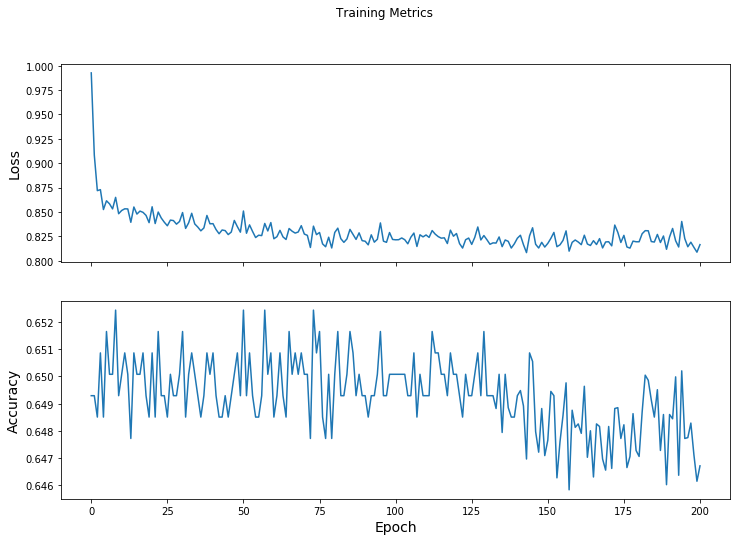

In [382]:
fig, axes = plt.subplots(2, sharex=True, figsize=(12, 8))
fig.suptitle('Training Metrics')

axes[0].set_ylabel("Loss", fontsize=14)
axes[0].plot(train_loss_results)

axes[1].set_ylabel("Accuracy", fontsize=14)
axes[1].set_xlabel("Epoch", fontsize=14)
axes[1].plot(train_accuracy_results)

plt.show()

In [25]:
test_url = "http://download.tensorflow.org/data/iris_test.csv"

test_fp = tf.keras.utils.get_file(fname=os.path.basename(test_url),
                                  origin=test_url)

test_dataset = tf.data.TextLineDataset('/home/japneet/.keras/datasets/iris_test.csv')
test_dataset = test_dataset.skip(1)             # skip header row
test_dataset = test_dataset.map(parse_csv)      # parse each row with the funcition created earlier
test_dataset = test_dataset.shuffle(1000)       # randomize
test_dataset = test_dataset.batch(32)           # use the same batch size as the training set

features are  Tensor("Reshape:0", shape=(4,), dtype=float32)
label is  Tensor("Reshape_1:0", shape=(), dtype=int32)


In [27]:
test_accuracy = tfe.metrics.Accuracy()

for (x, y) in tfe.Iterator(test_dataset):
  prediction = tf.argmax(model(x), axis=1, output_type=tf.int32)
  test_accuracy(prediction, y)

print("Test set accuracy: {:.3%}".format(test_accuracy.result()))

Test set accuracy: 96.667%


In [28]:
class_ids = ["Iris setosa", "Iris versicolor", "Iris virginica"]

predict_dataset = tf.convert_to_tensor([
    [5.1, 3.3, 1.7, 0.5,],
    [5.9, 3.0, 4.2, 1.5,],
    [6.9, 3.1, 5.4, 2.1]
])

predictions = model(predict_dataset)

for i, logits in enumerate(predictions):
  class_idx = tf.argmax(logits).numpy()
  name = class_ids[class_idx]
  print("Example {} prediction: {}".format(i, name))

Example 0 prediction: Iris setosa
Example 1 prediction: Iris versicolor
Example 2 prediction: Iris virginica
